# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
from scipy import stats
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/home/eduardo/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (0.11628940911112959, 0.9435134068698052)
1    (2.1216166425546956, 0.34617587588063486)
2    (2.7815816928163164, 0.24887840219169555)
3     (5.073602121577434, 0.07911909256834729)
4     (2.4368385746054333, 0.2956972100307283)
dtype: object

#### Interpret the normaltest results and make your observations.

In [3]:
# Se trata de una distribución normal. Nada por debajo del coeficiente de error.


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

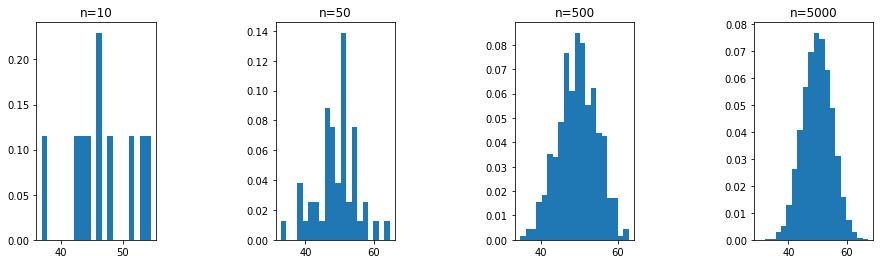

In [4]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
# Las gráficas muestran que a más datos en la muestra la distribución tiende a ser normal.


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

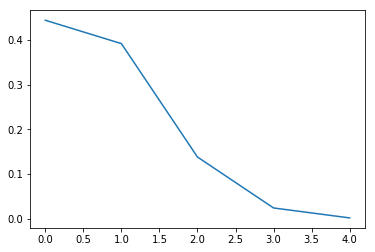

In [6]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [7]:
# La probabilidad de que una persona te haga click es del 40% pero desciende si hablamos de más personas. Que lo hagan las cinco es muy poco probable.

#### Now plot PMP with 50, 500, and 5000 visitors.

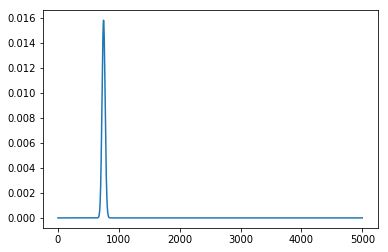

In [8]:
# Your code here
from scipy.stats import binom

n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [9]:
# Cuanta más población más se acerca al 15% de probabilidad descrito en el enunciado. En realidad parece estar relacionado con el teorema del límite central.


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [14]:
# Estipula la probabilidad de que una serie de sucesos ocurran en un pepríodo determinado de tiempo. Se mp0lea para calcular la probabilidad de que ocurra algo poco probable.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [15]:
from scipy.stats import poisson

poisson.pmf(300,320)

0.01216063471394124

#### What is the probability of getting 60 visits?

In [16]:
poisson.pmf(300,60)

7.97816763099837e-108

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

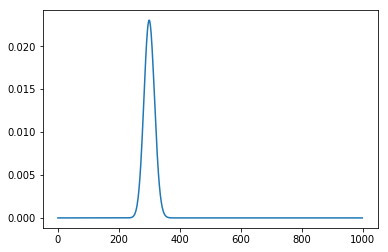

In [17]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)